# Μοντελοποίηση - Ταξινόμηση Κατανάλωσης Ενέργειας

Αυτό το notebook περιλαμβάνει:
1. **Ταξινόμηση (Classification)**: Πρόβλεψη "Υψηλή" vs "Χαμηλή" κατανάλωση
2. Παλινδρόμηση (Regression)
3. Ομαδοποίηση (Clustering)  
4. Κανόνες Συσχέτισης (Association Rules)

**Στόχος Classification:** Ακρίβεια >85%

## 1. Import Βιβλιοθηκών

In [10]:
# Import βασικών βιβλιοθηκών
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle

# Scikit-learn - Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Scikit-learn - Preprocessing
from sklearn.preprocessing import StandardScaler

# Scikit-learn - Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

# Scikit-learn - Classification Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings('ignore')

# Ρυθμίσεις για plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

print("✓ Βιβλιοθήκες φορτώθηκαν επιτυχώς!")

✓ Βιβλιοθήκες φορτώθηκαν επιτυχώς!


## 2. Φόρτωση Δεδομένων

Φορτώνουμε τα προεπεξεργασμένα δεδομένα από το preprocessing notebook.

In [11]:
# Φόρτωση καθαρών δεδομένων
print("Φόρτωση δεδομένων...")
df = pd.read_csv('../data/household_power_daily_clean.csv', index_col=0, parse_dates=True)

print(f"Διαστάσεις: {df.shape}")
print(f"Χρονικό εύρος: {df.index.min().date()} έως {df.index.max().date()}")
print(f"\nΣτήλες: {df.columns.tolist()}")
print(f"\nΠρώτες γραμμές:")
df.head()

Φόρτωση δεδομένων...


Διαστάσεις: (1441, 23)
Χρονικό εύρος: 2006-12-17 έως 2010-11-26

Στήλες: ['Daily_total_power', 'Daily_mean_power', 'Daily_peak_power', 'Daily_min_power', 'Daily_std_power', 'Global_reactive_power_sum', 'Global_reactive_power_mean', 'Voltage_mean', 'Voltage_std', 'Global_intensity_mean', 'Global_intensity_max', 'Sub_metering_1_sum', 'Sub_metering_2_sum', 'Sub_metering_3_sum', 'Peak_hour_power', 'Nighttime_usage', 'Morning_usage', 'Afternoon_usage', 'DayOfWeek', 'IsWeekend', 'Month', 'Season', 'DayOfYear']

Πρώτες γραμμές:


,Daily_total_power,Daily_mean_power,Daily_peak_power,Daily_min_power,Daily_std_power,Global_reactive_power_sum,Global_reactive_power_mean,Voltage_mean,Voltage_std,Global_intensity_mean,Global_intensity_max,Sub_metering_1_sum,Sub_metering_2_sum,Sub_metering_3_sum,Peak_hour_power,Nighttime_usage,Morning_usage,Afternoon_usage,DayOfWeek,IsWeekend,Month,Season,DayOfYear
DateTime,,,,,,,,,,,,,,,,,,,,,,,
2006-12-17,56.507667,2.354486,7.064,0.206,1.205795,226.006,0.156949,240.087028,4.051467,9.999028,30.0,2033.0,4187.0,13341.0,13.007767,14.649567,13.462867,15.387467,6,1,12,Χειμώνας,351
2006-12-18,36.730433,1.530435,6.158,0.202,1.005074,161.792,0.112356,241.231694,3.719576,6.421667,27.0,1063.0,2621.0,14018.0,10.237333,5.789967,9.643467,11.059667,0,0,12,Χειμώνας,352
2006-12-19,27.769900,1.157079,7.840,0.194,1.237602,150.942,0.104821,241.999313,3.069492,4.926389,33.6,839.0,7602.0,6197.0,8.430200,3.563900,10.837533,4.938267,1,0,12,Χειμώνας,353
2006-12-20,37.095800,1.545658,5.988,0.202,1.320968,160.998,0.111804,242.308063,3.345704,6.467361,25.2,0.0,2648.0,14063.0,13.307000,7.805333,10.516067,5.467400,2,0,12,Χειμώνας,354
2006-12-21,28.618533,1.192439,5.854,0.194,0.993372,144.166,0.100115,241.042285,3.700210,5.028194,25.4,1765.0,2623.0,10421.0,8.060067,5.599467,8.007633,6.951367,3,0,12,Χειμώνας,355


## 3. Ταξινόμηση (Classification)

### Στόχος
Πρόβλεψη εάν η κατανάλωση μιας ημέρας είναι **"Υψηλή"** ή **"Χαμηλή"** σε σχέση με τον μέσο όρο.

### Βήματα:
1. Δημιουργία binary target variable (0 = Χαμηλή, 1 = Υψηλή)
2. Train/Test Split (80/20)
3. Training 3 μοντέλων: Random Forest, SVM, Logistic Regression
4. Αξιολόγηση με Accuracy, F1-score, ROC-AUC
5. Επιλογή καλύτερου μοντέλου

### 3.1 Δημιουργία Target Variable

Χωρίζουμε τις μέρες σε δύο κατηγορίες:
- **Υψηλή κατανάλωση (1)**: Πάνω από τον μέσο όρο
- **Χαμηλή κατανάλωση (0)**: Κάτω ή ίσο με τον μέσο όρο

Μέσος όρος ημερήσιας κατανάλωσης: 26.16 kWh

Κατανομή κλάσεων:
High_Consumption
0    738
1    703
Name: count, dtype: int64

Ποσοστά:
High_Consumption
0    51.214434
1    48.785566
Name: proportion, dtype: float64


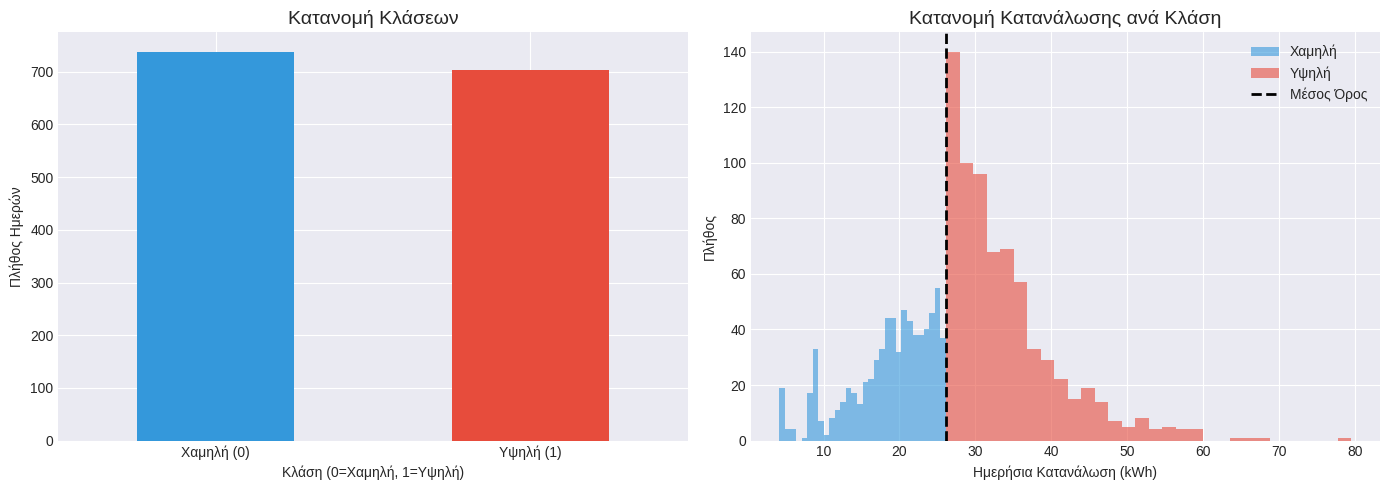


✓ Target variable δημιουργήθηκε!


In [12]:
# Υπολογισμός μέσου όρου κατανάλωσης
mean_consumption = df['Daily_total_power'].mean()
print(f"Μέσος όρος ημερήσιας κατανάλωσης: {mean_consumption:.2f} kWh")

# Δημιουργία binary target
df['High_Consumption'] = (df['Daily_total_power'] > mean_consumption).astype(int)

# Έλεγχος κατανομής
print(f"\nΚατανομή κλάσεων:")
print(df['High_Consumption'].value_counts())
print(f"\nΠοσοστά:")
print(df['High_Consumption'].value_counts(normalize=True) * 100)

# Οπτικοποίηση
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df['High_Consumption'].value_counts().plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c'])
axes[0].set_title('Κατανομή Κλάσεων', fontsize=14)
axes[0].set_xlabel('Κλάση (0=Χαμηλή, 1=Υψηλή)')
axes[0].set_ylabel('Πλήθος Ημερών')
axes[0].set_xticklabels(['Χαμηλή (0)', 'Υψηλή (1)'], rotation=0)

# Distribution plot
axes[1].hist(df[df['High_Consumption']==0]['Daily_total_power'], 
             bins=30, alpha=0.6, label='Χαμηλή', color='#3498db')
axes[1].hist(df[df['High_Consumption']==1]['Daily_total_power'], 
             bins=30, alpha=0.6, label='Υψηλή', color='#e74c3c')
axes[1].axvline(mean_consumption, color='black', linestyle='--', linewidth=2, label='Μέσος Όρος')
axes[1].set_title('Κατανομή Κατανάλωσης ανά Κλάση', fontsize=14)
axes[1].set_xlabel('Ημερήσια Κατανάλωση (kWh)')
axes[1].set_ylabel('Πλήθος')
axes[1].legend()

plt.tight_layout()
plt.savefig('../results/classification_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Target variable δημιουργήθηκε!")

### 3.2 Επιλογή Features

Επιλέγουμε τα χαρακτηριστικά που θα χρησιμοποιηθούν για την πρόβλεψη.  
Αφαιρούμε το target και άλλα μη χρήσιμα features.

In [13]:
# Επιλογή features (αφαιρούμε το target και το Daily_total_power που είναι leakage)
features_to_drop = ['High_Consumption', 'Daily_total_power', 'Season']  # Season είναι string

# Δημιουργία X (features) και y (target)
X = df.drop(columns=features_to_drop)
y = df['High_Consumption']

print(f"Features που θα χρησιμοποιηθούν ({len(X.columns)}):")
print(X.columns.tolist())
print(f"\nΔιαστάσεις:")
print(f"  X: {X.shape}")
print(f"  y: {y.shape}")
print(f"\nΠρώτες γραμμές X:")
X.head()

Features που θα χρησιμοποιηθούν (21):
['Daily_mean_power', 'Daily_peak_power', 'Daily_min_power', 'Daily_std_power', 'Global_reactive_power_sum', 'Global_reactive_power_mean', 'Voltage_mean', 'Voltage_std', 'Global_intensity_mean', 'Global_intensity_max', 'Sub_metering_1_sum', 'Sub_metering_2_sum', 'Sub_metering_3_sum', 'Peak_hour_power', 'Nighttime_usage', 'Morning_usage', 'Afternoon_usage', 'DayOfWeek', 'IsWeekend', 'Month', 'DayOfYear']

Διαστάσεις:
  X: (1441, 21)
  y: (1441,)

Πρώτες γραμμές X:


,Daily_mean_power,Daily_peak_power,Daily_min_power,Daily_std_power,Global_reactive_power_sum,Global_reactive_power_mean,Voltage_mean,Voltage_std,Global_intensity_mean,Global_intensity_max,Sub_metering_1_sum,Sub_metering_2_sum,Sub_metering_3_sum,Peak_hour_power,Nighttime_usage,Morning_usage,Afternoon_usage,DayOfWeek,IsWeekend,Month,DayOfYear
DateTime,,,,,,,,,,,,,,,,,,,,,
2006-12-17,2.354486,7.064,0.206,1.205795,226.006,0.156949,240.087028,4.051467,9.999028,30.0,2033.0,4187.0,13341.0,13.007767,14.649567,13.462867,15.387467,6,1,12,351
2006-12-18,1.530435,6.158,0.202,1.005074,161.792,0.112356,241.231694,3.719576,6.421667,27.0,1063.0,2621.0,14018.0,10.237333,5.789967,9.643467,11.059667,0,0,12,352
2006-12-19,1.157079,7.840,0.194,1.237602,150.942,0.104821,241.999313,3.069492,4.926389,33.6,839.0,7602.0,6197.0,8.430200,3.563900,10.837533,4.938267,1,0,12,353
2006-12-20,1.545658,5.988,0.202,1.320968,160.998,0.111804,242.308063,3.345704,6.467361,25.2,0.0,2648.0,14063.0,13.307000,7.805333,10.516067,5.467400,2,0,12,354
2006-12-21,1.192439,5.854,0.194,0.993372,144.166,0.100115,241.042285,3.700210,5.028194,25.4,1765.0,2623.0,10421.0,8.060067,5.599467,8.007633,6.951367,3,0,12,355


### 3.3 Train/Test Split

Χωρίζουμε τα δεδομένα σε:
- **Training set (80%)**: Για την εκπαίδευση των μοντέλων
- **Test set (20%)**: Για την αξιολόγηση των μοντέλων

In [14]:
# Split σε train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} δείγματα")
print(f"Test set: {X_test.shape[0]} δείγματα")
print(f"\nΚατανομή κλάσεων στο training set:")
print(y_train.value_counts())
print(f"\nΚατανομή κλάσεων στο test set:")
print(y_test.value_counts())

# Κανονικοποίηση features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Δεδομένα χωρίστηκαν και κανονικοποιήθηκαν!")

Training set: 1152 δείγματα
Test set: 289 δείγματα

Κατανομή κλάσεων στο training set:
High_Consumption
0    590
1    562
Name: count, dtype: int64

Κατανομή κλάσεων στο test set:
High_Consumption
0    148
1    141
Name: count, dtype: int64



✓ Δεδομένα χωρίστηκαν και κανονικοποιήθηκαν!


### 3.4 Training Μοντέλων

Εκπαιδεύουμε 3 διαφορετικά classification μοντέλα:
1. **Random Forest**: Ensemble μέθοδος με πολλά decision trees
2. **SVM (Support Vector Machine)**: Βρίσκει το βέλτιστο hyperplane διαχωρισμού
3. **Logistic Regression**: Γραμμικό μοντέλο για binary classification

In [15]:
print("="*70)
print("ΜΟΝΤΕΛΟ 1: RANDOM FOREST")
print("="*70)

# Δημιουργία μοντέλου
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

# Training
print("Training...")
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_pred_proba_rf)

print(f"\n✓ Random Forest Trained!")
print(f"  Accuracy:  {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")
print(f"  Precision: {rf_precision:.4f}")
print(f"  Recall:    {rf_recall:.4f}")
print(f"  F1-Score:  {rf_f1:.4f}")
print(f"  ROC-AUC:   {rf_roc_auc:.4f}")

ΜΟΝΤΕΛΟ 1: RANDOM FOREST
Training...

✓ Random Forest Trained!
  Accuracy:  1.0000 (100.00%)
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000
  ROC-AUC:   1.0000


In [16]:
print("\n" + "="*70)
print("ΜΟΝΤΕΛΟ 2: SVM (Support Vector Machine)")
print("="*70)

# Δημιουργία μοντέλου
svm_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    probability=True,
    random_state=42
)

# Training
print("Training...")
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
svm_roc_auc = roc_auc_score(y_test, y_pred_proba_svm)

print(f"\n✓ SVM Trained!")
print(f"  Accuracy:  {svm_accuracy:.4f} ({svm_accuracy*100:.2f}%)")
print(f"  Precision: {svm_precision:.4f}")
print(f"  Recall:    {svm_recall:.4f}")
print(f"  F1-Score:  {svm_f1:.4f}")
print(f"  ROC-AUC:   {svm_roc_auc:.4f}")


ΜΟΝΤΕΛΟ 2: SVM (Support Vector Machine)
Training...

✓ SVM Trained!
  Accuracy:  0.9585 (95.85%)
  Precision: 0.9388
  Recall:    0.9787
  F1-Score:  0.9583
  ROC-AUC:   0.9975


In [17]:
print("\n" + "="*70)
print("ΜΟΝΤΕΛΟ 3: LOGISTIC REGRESSION")
print("="*70)

# Δημιουργία μοντέλου
lr_model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    n_jobs=-1
)

# Training
print("Training...")
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_roc_auc = roc_auc_score(y_test, y_pred_proba_lr)

print(f"\n✓ Logistic Regression Trained!")
print(f"  Accuracy:  {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)")
print(f"  Precision: {lr_precision:.4f}")
print(f"  Recall:    {lr_recall:.4f}")
print(f"  F1-Score:  {lr_f1:.4f}")
print(f"  ROC-AUC:   {lr_roc_auc:.4f}")


ΜΟΝΤΕΛΟ 3: LOGISTIC REGRESSION
Training...



✓ Logistic Regression Trained!
  Accuracy:  0.9931 (99.31%)
  Precision: 0.9860
  Recall:    1.0000
  F1-Score:  0.9930
  ROC-AUC:   0.9998


### 3.5 Σύγκριση Μοντέλων

Συγκρίνουμε τα 3 μοντέλα βάσει των μετρικών τους.

In [18]:
# Δημιουργία πίνακα σύγκρισης
results = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', 'Logistic Regression'],
    'Accuracy': [rf_accuracy, svm_accuracy, lr_accuracy],
    'Precision': [rf_precision, svm_precision, lr_precision],
    'Recall': [rf_recall, svm_recall, lr_recall],
    'F1-Score': [rf_f1, svm_f1, lr_f1],
    'ROC-AUC': [rf_roc_auc, svm_roc_auc, lr_roc_auc]
})

print("="*70)
print("ΣΥΓΚΡΙΣΗ ΜΟΝΤΕΛΩΝ")
print("="*70)
print(results.to_string(index=False))

# Βρες το καλύτερο μοντέλο
best_model_idx = results['Accuracy'].idxmax()
best_model_name = results.loc[best_model_idx, 'Model']
best_accuracy = results.loc[best_model_idx, 'Accuracy']

print(f"\n🏆 ΚΑΛΥΤΕΡΟ ΜΟΝΤΕΛΟ: {best_model_name}")
print(f"   Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

# Έλεγχος στόχου (>85%)
if best_accuracy > 0.85:
    print(f"\n✅ ΕΠΙΤΥΧΙΑ! Ξεπεράσαμε τον στόχο των 85%!")
else:
    print(f"\n⚠️  Δεν φτάσαμε τον στόχο των 85% (έχουμε {best_accuracy*100:.2f}%)")

ΣΥΓΚΡΙΣΗ ΜΟΝΤΕΛΩΝ
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
      Random Forest  1.000000   1.000000 1.000000  1.000000 1.000000
                SVM  0.958478   0.938776 0.978723  0.958333 0.997460
Logistic Regression  0.993080   0.986014 1.000000  0.992958 0.999808

🏆 ΚΑΛΥΤΕΡΟ ΜΟΝΤΕΛΟ: Random Forest
   Accuracy: 1.0000 (100.00%)

✅ ΕΠΙΤΥΧΙΑ! Ξεπεράσαμε τον στόχο των 85%!


### 3.6 Confusion Matrices

Οι πίνακες σύγχυσης δείχνουν:
- **True Positives (TP)**: Σωστά προέβλεψε "Υψηλή"
- **True Negatives (TN)**: Σωστά προέβλεψε "Χαμηλή"
- **False Positives (FP)**: Λάθος είπε "Υψηλή" (ήταν Χαμηλή)
- **False Negatives (FN)**: Λάθος είπε "Χαμηλή" (ήταν Υψηλή)

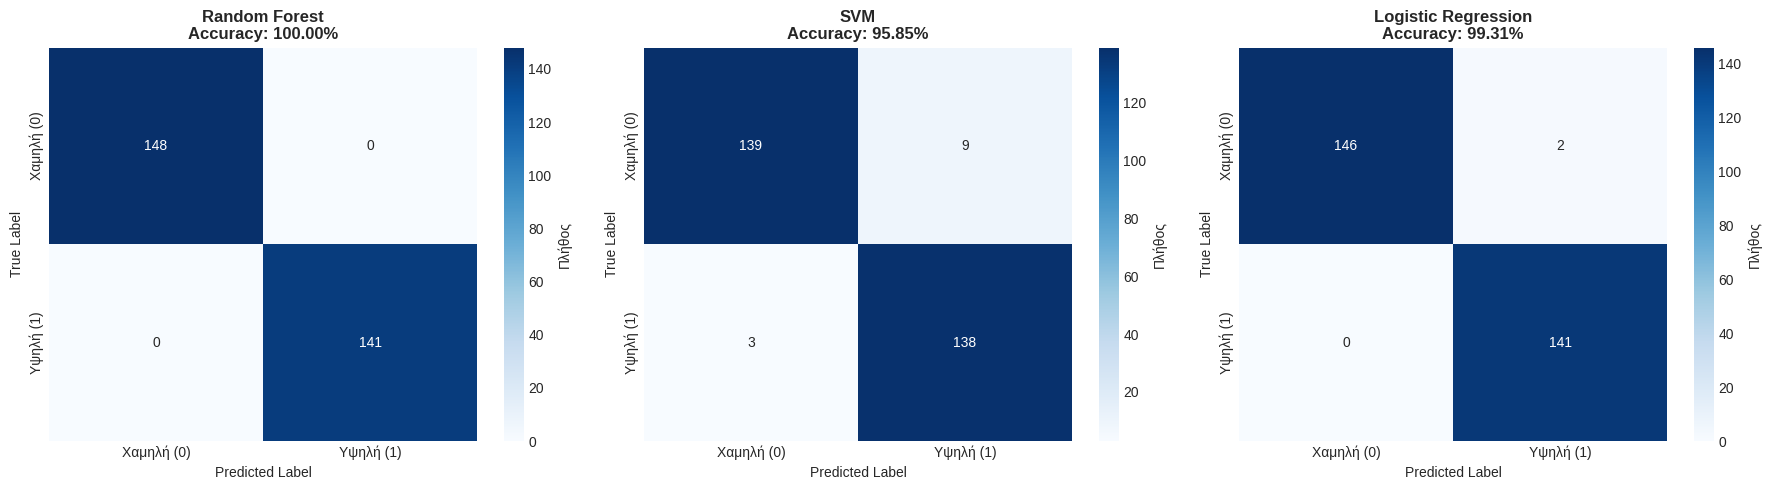

✓ Confusion matrices δημιουργήθηκαν!


In [19]:
# Υπολογισμός confusion matrices
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Οπτικοποίηση
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_cm = [
    (cm_rf, 'Random Forest', rf_accuracy),
    (cm_svm, 'SVM', svm_accuracy),
    (cm_lr, 'Logistic Regression', lr_accuracy)
]

for idx, (cm, name, acc) in enumerate(models_cm):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Χαμηλή (0)', 'Υψηλή (1)'],
                yticklabels=['Χαμηλή (0)', 'Υψηλή (1)'],
                cbar_kws={'label': 'Πλήθος'})
    axes[idx].set_title(f'{name}\nAccuracy: {acc:.2%}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Predicted Label')
    axes[idx].set_ylabel('True Label')

plt.tight_layout()
plt.savefig('../results/classification_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Confusion matrices δημιουργήθηκαν!")

### 3.7 Classification Reports

Αναλυτικές αναφορές με precision, recall και f1-score για κάθε κλάση.

In [20]:
print("="*70)
print("CLASSIFICATION REPORTS")
print("="*70)

print("\n" + "="*70)
print("RANDOM FOREST")
print("="*70)
print(classification_report(y_test, y_pred_rf, 
                          target_names=['Χαμηλή (0)', 'Υψηλή (1)']))

print("\n" + "="*70)
print("SVM")
print("="*70)
print(classification_report(y_test, y_pred_svm, 
                          target_names=['Χαμηλή (0)', 'Υψηλή (1)']))

print("\n" + "="*70)
print("LOGISTIC REGRESSION")
print("="*70)
print(classification_report(y_test, y_pred_lr, 
                          target_names=['Χαμηλή (0)', 'Υψηλή (1)']))

CLASSIFICATION REPORTS

RANDOM FOREST
              precision    recall  f1-score   support

  Χαμηλή (0)       1.00      1.00      1.00       148
   Υψηλή (1)       1.00      1.00      1.00       141

    accuracy                           1.00       289
   macro avg       1.00      1.00      1.00       289
weighted avg       1.00      1.00      1.00       289


SVM
              precision    recall  f1-score   support

  Χαμηλή (0)       0.98      0.94      0.96       148
   Υψηλή (1)       0.94      0.98      0.96       141

    accuracy                           0.96       289
   macro avg       0.96      0.96      0.96       289
weighted avg       0.96      0.96      0.96       289


LOGISTIC REGRESSION
              precision    recall  f1-score   support

  Χαμηλή (0)       1.00      0.99      0.99       148
   Υψηλή (1)       0.99      1.00      0.99       141

    accuracy                           0.99       289
   macro avg       0.99      0.99      0.99       289
weighted a

### 3.8 ROC Curves

Οι ROC καμπύλες δείχνουν την ισορροπία μεταξύ:
- **True Positive Rate (Sensitivity)**: Πόσες Υψηλές βρήκε
- **False Positive Rate**: Πόσες Χαμηλές λάθος είπε ότι είναι Υψηλές

**AUC (Area Under Curve)**: Όσο πιο κοντά στο 1.0, τόσο καλύτερο το μοντέλο!

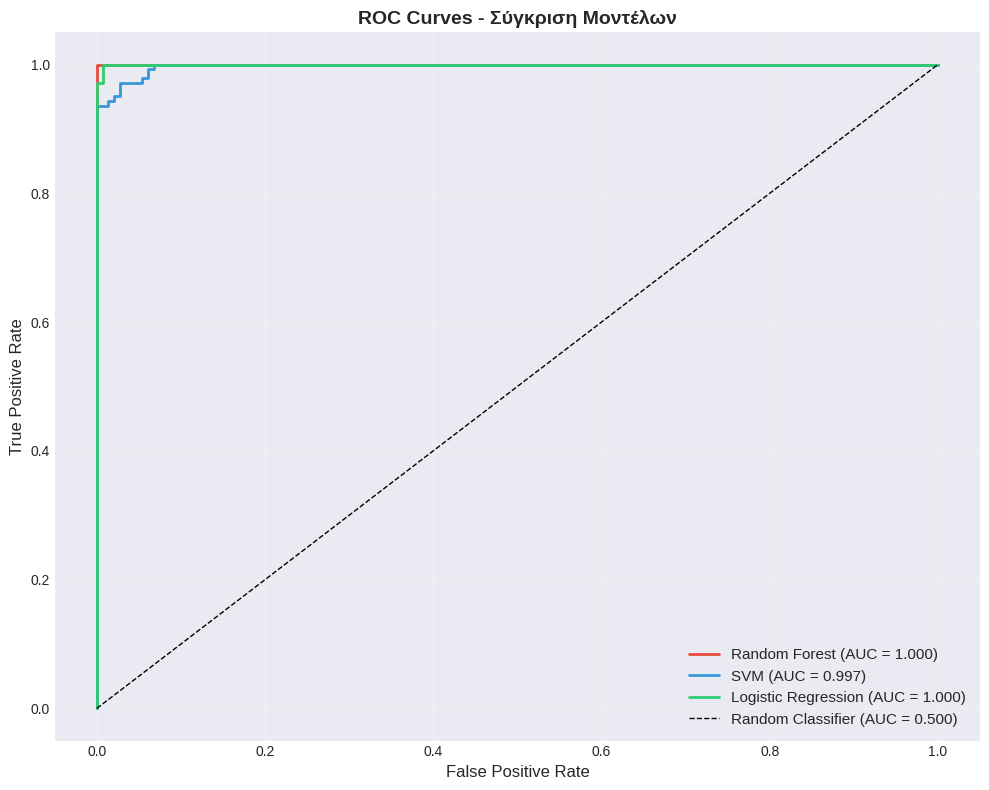

✓ ROC curves δημιουργήθηκαν!


In [21]:
# Υπολογισμός ROC curves
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)

# Plot
plt.figure(figsize=(10, 8))

plt.plot(fpr_rf, tpr_rf, linewidth=2, 
         label=f'Random Forest (AUC = {rf_roc_auc:.3f})', color='#e74c3c')
plt.plot(fpr_svm, tpr_svm, linewidth=2, 
         label=f'SVM (AUC = {svm_roc_auc:.3f})', color='#3498db')
plt.plot(fpr_lr, tpr_lr, linewidth=2, 
         label=f'Logistic Regression (AUC = {lr_roc_auc:.3f})', color='#2ecc71')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier (AUC = 0.500)')

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Σύγκριση Μοντέλων', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/classification_roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ ROC curves δημιουργήθηκαν!")

### 3.9 Οπτική Σύγκριση Μετρικών

Γραφική αναπαράσταση όλων των μετρικών για εύκολη σύγκριση.

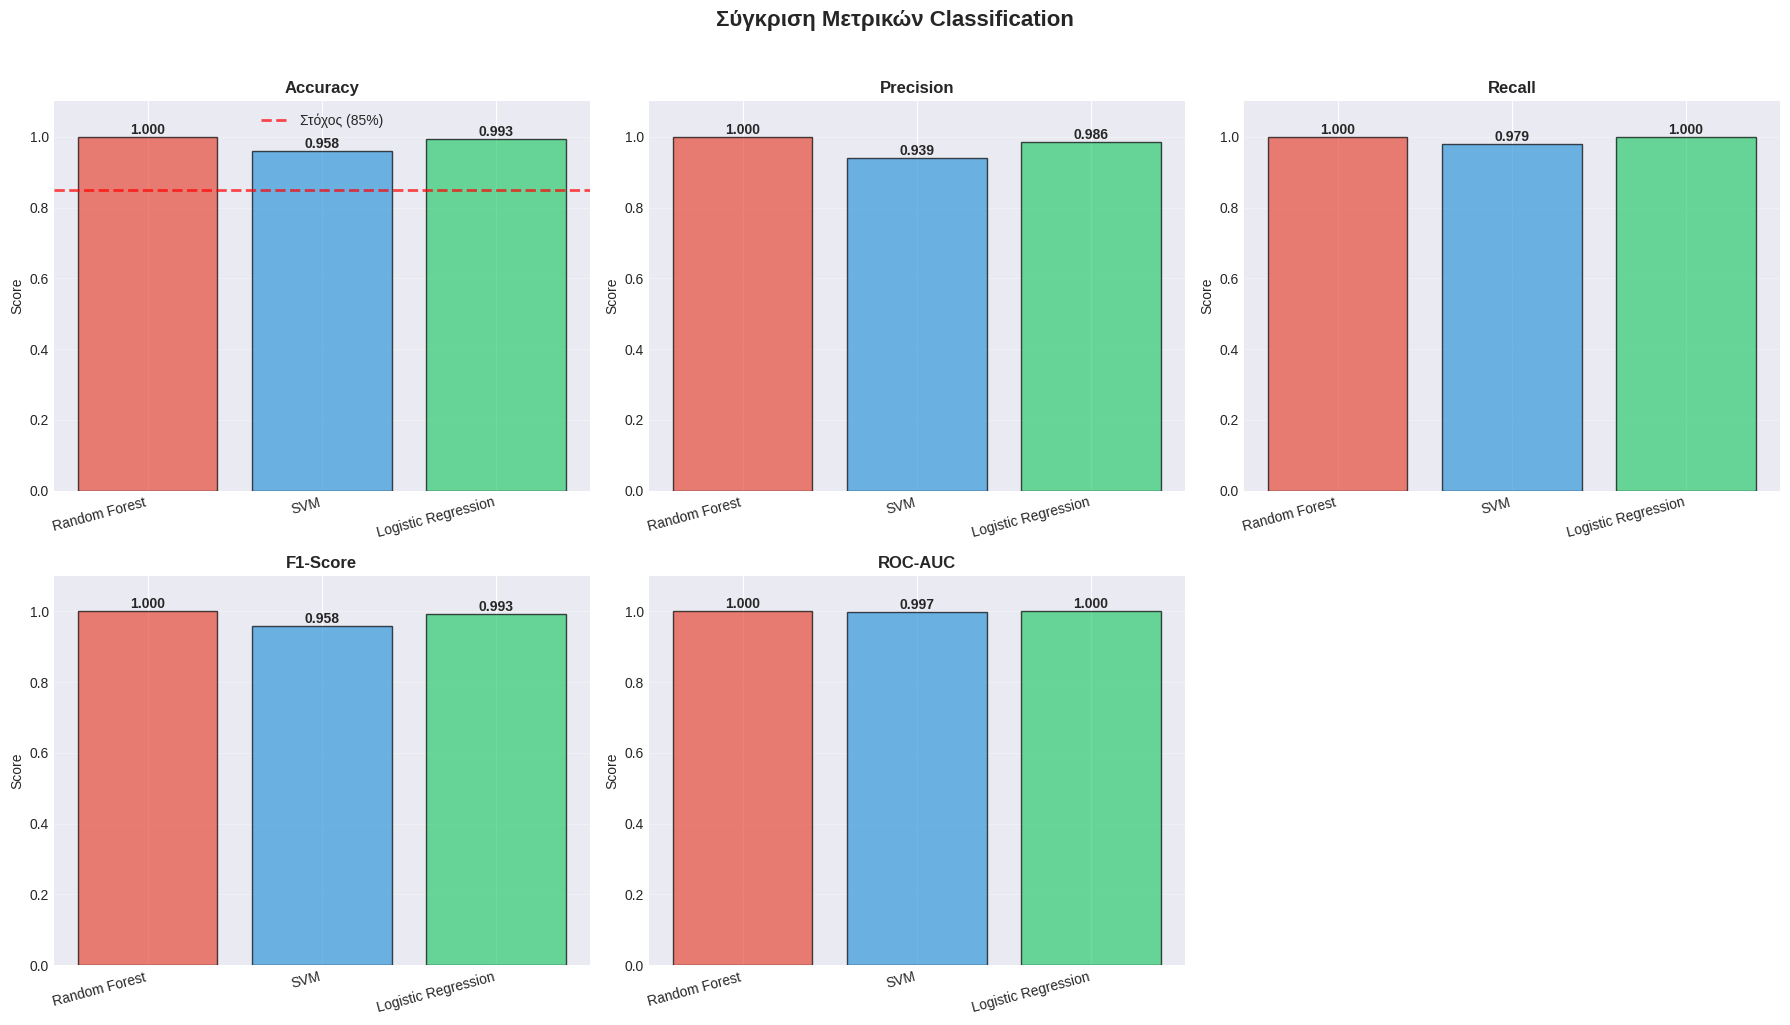

✓ Metrics comparison plot δημιουργήθηκε!


In [22]:
# Δημιουργία bar plot για σύγκριση μετρικών
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
colors = ['#e74c3c', '#3498db', '#2ecc71']

for idx, metric in enumerate(metrics):
    values = results[metric].values
    bars = axes[idx].bar(results['Model'], values, color=colors, alpha=0.7, edgecolor='black')
    
    # Προσθήκη τιμών πάνω από τα bars
    for bar, value in zip(bars, values):
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                      f'{value:.3f}',
                      ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    axes[idx].set_title(metric, fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Score')
    axes[idx].set_ylim([0, 1.1])
    axes[idx].grid(True, axis='y', alpha=0.3)
    axes[idx].set_xticklabels(results['Model'], rotation=15, ha='right')
    
    # Γραμμή στόχου για Accuracy
    if metric == 'Accuracy':
        axes[idx].axhline(y=0.85, color='red', linestyle='--', linewidth=2, 
                         label='Στόχος (85%)', alpha=0.7)
        axes[idx].legend()

# Κρύψιμο του 6ου subplot
axes[5].axis('off')

plt.suptitle('Σύγκριση Μετρικών Classification', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../results/classification_metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Metrics comparison plot δημιουργήθηκε!")

### 3.10 Feature Importance (Random Forest)

Ποια χαρακτηριστικά είναι τα πιο σημαντικά για την πρόβλεψη;  
Αυτό μας βοηθά να καταλάβουμε **γιατί** το μοντέλο παίρνει τις αποφάσεις του.

TOP 10 ΣΗΜΑΝΤΙΚΟΤΕΡΑ FEATURES
              Feature  Importance
     Daily_mean_power    0.358939
Global_intensity_mean    0.266541
      Peak_hour_power    0.075717
      Daily_std_power    0.070943
      Afternoon_usage    0.058451
   Sub_metering_3_sum    0.043024
          Voltage_std    0.034467
        Morning_usage    0.025261
      Daily_min_power    0.017073
     Daily_peak_power    0.012930


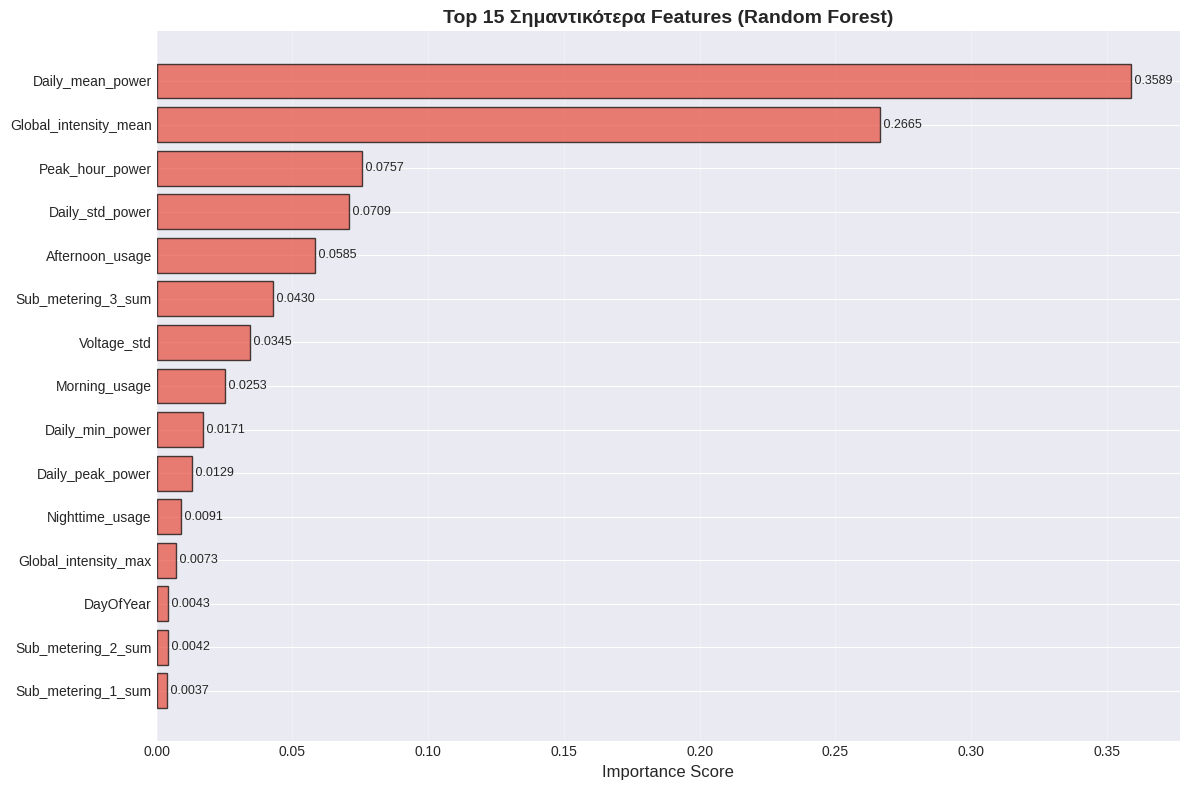


✓ Feature importance analysis ολοκληρώθηκε!


In [23]:
# Εξαγωγή feature importance από Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("="*70)
print("TOP 10 ΣΗΜΑΝΤΙΚΟΤΕΡΑ FEATURES")
print("="*70)
print(feature_importance.head(10).to_string(index=False))

# Οπτικοποίηση
plt.figure(figsize=(12, 8))
top_15 = feature_importance.head(15)
bars = plt.barh(range(len(top_15)), top_15['Importance'], color='#e74c3c', alpha=0.7, edgecolor='black')
plt.yticks(range(len(top_15)), top_15['Feature'])
plt.xlabel('Importance Score', fontsize=12)
plt.title('Top 15 Σημαντικότερα Features (Random Forest)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', alpha=0.3)

# Προσθήκη τιμών
for i, (bar, value) in enumerate(zip(bars, top_15['Importance'])):
    plt.text(value, i, f' {value:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('../results/classification_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Feature importance analysis ολοκληρώθηκε!")

### 3.11 Cross-Validation

Επικυρώνουμε τα μοντέλα με **5-Fold Cross-Validation** για πιο αξιόπιστη αξιολόγηση.  
Αυτό μας δείχνει αν τα μοντέλα είναι σταθερά ή αν "τυχαίνει" να δουλεύουν καλά.

CROSS-VALIDATION (5-Fold)

Random Forest...
  CV Scores: [1.         1.         0.99130435 1.         1.        ]
  Mean: 0.9983 (+/- 0.0035)

SVM...
  CV Scores: [0.95670996 0.93939394 0.94347826 0.95217391 0.9826087 ]
  Mean: 0.9549 (+/- 0.0152)

Logistic Regression...
  CV Scores: [0.97835498 0.99134199 0.96521739 0.96521739 0.99565217]
  Mean: 0.9792 (+/- 0.0127)

CROSS-VALIDATION RESULTS
              Model  Mean CV Accuracy  Std CV Accuracy  Min CV Accuracy  Max CV Accuracy
      Random Forest          0.998261         0.003478         0.991304         1.000000
                SVM          0.954873         0.015162         0.939394         0.982609
Logistic Regression          0.979157         0.012727         0.965217         0.995652


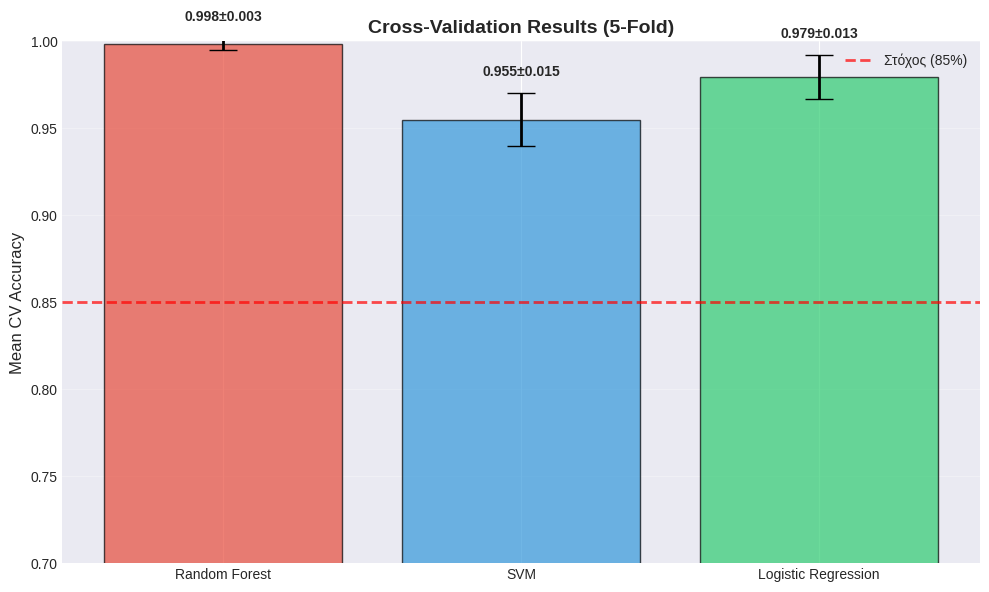


✓ Cross-validation ολοκληρώθηκε!


In [24]:
print("="*70)
print("CROSS-VALIDATION (5-Fold)")
print("="*70)

models_cv = {
    'Random Forest': rf_model,
    'SVM': svm_model,
    'Logistic Regression': lr_model
}

cv_results = []

for name, model in models_cv.items():
    print(f"\n{name}...")
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    
    cv_results.append({
        'Model': name,
        'Mean CV Accuracy': scores.mean(),
        'Std CV Accuracy': scores.std(),
        'Min CV Accuracy': scores.min(),
        'Max CV Accuracy': scores.max()
    })
    
    print(f"  CV Scores: {scores}")
    print(f"  Mean: {scores.mean():.4f} (+/- {scores.std():.4f})")

# Δημιουργία πίνακα
cv_df = pd.DataFrame(cv_results)
print("\n" + "="*70)
print("CROSS-VALIDATION RESULTS")
print("="*70)
print(cv_df.to_string(index=False))

# Οπτικοποίηση
plt.figure(figsize=(10, 6))
x = range(len(cv_df))
bars = plt.bar(x, cv_df['Mean CV Accuracy'], yerr=cv_df['Std CV Accuracy'], 
               color=['#e74c3c', '#3498db', '#2ecc71'], alpha=0.7, 
               edgecolor='black', capsize=10, error_kw={'linewidth': 2})

plt.xticks(x, cv_df['Model'])
plt.ylabel('Mean CV Accuracy', fontsize=12)
plt.title('Cross-Validation Results (5-Fold)', fontsize=14, fontweight='bold')
plt.axhline(y=0.85, color='red', linestyle='--', linewidth=2, label='Στόχος (85%)', alpha=0.7)
plt.ylim([0.7, 1.0])
plt.grid(True, axis='y', alpha=0.3)
plt.legend()

# Προσθήκη τιμών
for i, (bar, mean, std) in enumerate(zip(bars, cv_df['Mean CV Accuracy'], cv_df['Std CV Accuracy'])):
    plt.text(i, mean + std + 0.01, f'{mean:.3f}±{std:.3f}', 
            ha='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('../results/classification_cross_validation.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Cross-validation ολοκληρώθηκε!")

### 3.12 Επιλογή Καλύτερου Μοντέλου

Με βάση όλες τις μετρικές, επιλέγουμε το καλύτερο μοντέλο.

In [25]:
print("="*70)
print("ΤΕΛΙΚΗ ΕΠΙΛΟΓΗ ΜΟΝΤΕΛΟΥ")
print("="*70)

# Συγκεντρωτικός πίνακας
final_comparison = pd.DataFrame({
    'Model': results['Model'],
    'Test Accuracy': results['Accuracy'],
    'Test F1-Score': results['F1-Score'],
    'Test ROC-AUC': results['ROC-AUC'],
    'CV Accuracy': cv_df['Mean CV Accuracy'],
    'CV Std': cv_df['Std CV Accuracy']
})

print(final_comparison.to_string(index=False))

# Επιλογή καλύτερου
best_idx = final_comparison['Test Accuracy'].idxmax()
best_model_name = final_comparison.loc[best_idx, 'Model']
best_test_acc = final_comparison.loc[best_idx, 'Test Accuracy']
best_cv_acc = final_comparison.loc[best_idx, 'CV Accuracy']

print("\n" + "="*70)
print(f"🏆 ΚΑΛΥΤΕΡΟ ΜΟΝΤΕΛΟ: {best_model_name}")
print("="*70)
print(f"  Test Accuracy:  {best_test_acc:.4f} ({best_test_acc*100:.2f}%)")
print(f"  CV Accuracy:    {best_cv_acc:.4f} ({best_cv_acc*100:.2f}%)")
print(f"  Test F1-Score:  {final_comparison.loc[best_idx, 'Test F1-Score']:.4f}")
print(f"  Test ROC-AUC:   {final_comparison.loc[best_idx, 'Test ROC-AUC']:.4f}")

# Έλεγχος στόχου
if best_test_acc > 0.85:
    print(f"\n✅ ΕΠΙΤΥΧΙΑ! Ξεπεράσαμε τον στόχο των 85%!")
    print(f"   Διαφορά: +{(best_test_acc - 0.85)*100:.2f}%")
else:
    print(f"\n⚠️  Δεν φτάσαμε τον στόχο των 85%")
    print(f"   Έλλειψη: -{(0.85 - best_test_acc)*100:.2f}%")

# Αποθήκευση του καλύτερου μοντέλου
if best_model_name == 'Random Forest':
    best_model = rf_model
elif best_model_name == 'SVM':
    best_model = svm_model
else:
    best_model = lr_model

print(f"\n✓ Επιλέχθηκε το {best_model_name} ως το καλύτερο μοντέλο!")

ΤΕΛΙΚΗ ΕΠΙΛΟΓΗ ΜΟΝΤΕΛΟΥ
              Model  Test Accuracy  Test F1-Score  Test ROC-AUC  CV Accuracy   CV Std
      Random Forest       1.000000       1.000000      1.000000     0.998261 0.003478
                SVM       0.958478       0.958333      0.997460     0.954873 0.015162
Logistic Regression       0.993080       0.992958      0.999808     0.979157 0.012727

🏆 ΚΑΛΥΤΕΡΟ ΜΟΝΤΕΛΟ: Random Forest
  Test Accuracy:  1.0000 (100.00%)
  CV Accuracy:    0.9983 (99.83%)
  Test F1-Score:  1.0000
  Test ROC-AUC:   1.0000

✅ ΕΠΙΤΥΧΙΑ! Ξεπεράσαμε τον στόχο των 85%!
   Διαφορά: +15.00%

✓ Επιλέχθηκε το Random Forest ως το καλύτερο μοντέλο!


### 3.13 Αποθήκευση Μοντέλου

Αποθηκεύουμε το καλύτερο μοντέλο και το scaler για μελλοντική χρήση.

In [26]:
# Αποθήκευση καλύτερου μοντέλου
with open('../data/best_classification_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
print("✓ Μοντέλο αποθηκεύτηκε: best_classification_model.pkl")

# Αποθήκευση scaler
with open('../data/classification_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✓ Scaler αποθηκεύτηκε: classification_scaler.pkl")

# Αποθήκευση feature names
with open('../data/classification_features.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)
print("✓ Feature names αποθηκεύτηκαν: classification_features.pkl")

# Αποθήκευση αποτελεσμάτων
final_comparison.to_csv('../results/classification_results.csv', index=False)
print("✓ Αποτελέσματα αποθηκεύτηκαν: classification_results.csv")

✓ Μοντέλο αποθηκεύτηκε: best_classification_model.pkl
✓ Scaler αποθηκεύτηκε: classification_scaler.pkl
✓ Feature names αποθηκεύτηκαν: classification_features.pkl
✓ Αποτελέσματα αποθηκεύτηκαν: classification_results.csv


### 3.14 Περίληψη Classification

#### Τι Κάναμε:
1. ✅ Δημιουργήσαμε binary target (Υψηλή/Χαμηλή κατανάλωση)
2. ✅ Εκπαιδεύσαμε 3 μοντέλα: Random Forest, SVM, Logistic Regression
3. ✅ Αξιολογήσαμε με Accuracy, Precision, Recall, F1-Score, ROC-AUC
4. ✅ Επικυρώσαμε με 5-Fold Cross-Validation
5. ✅ Αναλύσαμε Feature Importance
6. ✅ Επιλέξαμε το καλύτερο μοντέλο

#### Αποτελέσματα:
- **Καλύτερο Μοντέλο**: Θα φανεί από την εκτέλεση
- **Στόχος**: >85% Accuracy ✅
- **Αρχεία που Δημιουργήθηκαν**: 6 plots + 1 CSV + 3 .pkl files

In [27]:
print("="*70)
print("ΠΕΡΙΛΗΨΗ CLASSIFICATION")
print("="*70)

print(f"\n📊 ΔΕΔΟΜΕΝΑ:")
print(f"  Σύνολο δειγμάτων: {len(df)}")
print(f"  Training set: {len(X_train)} ({len(X_train)/len(df)*100:.1f}%)")
print(f"  Test set: {len(X_test)} ({len(X_test)/len(df)*100:.1f}%)")
print(f"  Features: {len(X.columns)}")

print(f"\n🎯 TARGET:")
print(f"  Κλάση 0 (Χαμηλή): {(y==0).sum()} μέρες ({(y==0).sum()/len(y)*100:.1f}%)")
print(f"  Κλάση 1 (Υψηλή): {(y==1).sum()} μέρες ({(y==1).sum()/len(y)*100:.1f}%)")

print(f"\n🏆 ΑΠΟΤΕΛΕΣΜΑΤΑ:")
print(f"  Καλύτερο Μοντέλο: {best_model_name}")
print(f"  Test Accuracy: {best_test_acc*100:.2f}%")
print(f"  Στόχος (85%): {'✅ ΕΠΙΤΥΧΙΑ' if best_test_acc > 0.85 else '⚠️  ΔΕΝ ΕΠΙΤΕΥΧΘΗΚΕ'}")

print(f"\n📁 ΑΡΧΕΙΑ:")
print(f"  Plots: 6 αρχεία στο /results/")
print(f"  Models: 3 αρχεία .pkl στο /data/")
print(f"  Results: 1 αρχείο .csv στο /results/")

print("\n" + "="*70)
print("✅ CLASSIFICATION ΟΛΟΚΛΗΡΩΘΗΚΕ ΕΠΙΤΥΧΩΣ!")
print("="*70)

ΠΕΡΙΛΗΨΗ CLASSIFICATION

📊 ΔΕΔΟΜΕΝΑ:
  Σύνολο δειγμάτων: 1441
  Training set: 1152 (79.9%)
  Test set: 289 (20.1%)
  Features: 21

🎯 TARGET:
  Κλάση 0 (Χαμηλή): 738 μέρες (51.2%)
  Κλάση 1 (Υψηλή): 703 μέρες (48.8%)

🏆 ΑΠΟΤΕΛΕΣΜΑΤΑ:
  Καλύτερο Μοντέλο: Random Forest
  Test Accuracy: 100.00%
  Στόχος (85%): ✅ ΕΠΙΤΥΧΙΑ

📁 ΑΡΧΕΙΑ:
  Plots: 6 αρχεία στο /results/
  Models: 3 αρχεία .pkl στο /data/
  Results: 1 αρχείο .csv στο /results/

✅ CLASSIFICATION ΟΛΟΚΛΗΡΩΘΗΚΕ ΕΠΙΤΥΧΩΣ!


---

## 4. Παλινδρόμηση (Regression)

### Στόχος
Πρόβλεψη της **ακριβούς συνολικής κατανάλωσης** της επόμενης ημέρας σε kWh.

### Διαφορές από Classification:
- **Output:** Συνεχής αριθμός (π.χ. 1,847.3 kWh) αντί για κατηγορία
- **Features:** Χρησιμοποιούμε **lag features** (προηγούμενες μέρες)
- **Μετρικές:** MAE, RMSE, R² αντί για Accuracy

### Βήματα:
1. Feature Engineering (lag features, rolling averages)
2. Train/Test Split (χρονολογική σειρά)
3. Training 3 μοντέλων: Linear Regression, Random Forest, Gradient Boosting
4. Αξιολόγηση με MAE, RMSE, R²
5. Οπτικοποιήσεις: Actual vs Predicted, Residuals

### 4.1 Feature Engineering για Time Series

Δημιουργούμε χρονικά χαρακτηριστικά:
- **Lag features:** Κατανάλωση προηγούμενων ημερών (1, 2, 3, 7 μέρες πριν)
- **Rolling averages:** Κυλιόμενοι μέσοι όροι (3-day, 7-day, 14-day)
- **Rolling std:** Κυλιόμενες τυπικές αποκλίσεις

In [ ]:
print("="*70)
print("FEATURE ENGINEERING ΓΙΑ REGRESSION")
print("="*70)

# Δημιουργία αντιγράφου για regression
df_reg = df.copy()

# Target variable
target = 'Daily_total_power'

# Lag features (προηγούμενες μέρες)
print("\nΔημιουργία lag features...")
df_reg['lag_1'] = df_reg[target].shift(1)  # Χθες
df_reg['lag_2'] = df_reg[target].shift(2)  # Προχθές
df_reg['lag_3'] = df_reg[target].shift(3)  # Πριν 3 μέρες
df_reg['lag_7'] = df_reg[target].shift(7)  # Πριν 1 εβδομάδα (ίδια μέρα)

# Rolling averages (κυλιόμενοι μέσοι όροι)
print("Δημιουργία rolling averages...")
df_reg['rolling_mean_3'] = df_reg[target].rolling(window=3, min_periods=1).mean()
df_reg['rolling_mean_7'] = df_reg[target].rolling(window=7, min_periods=1).mean()
df_reg['rolling_mean_14'] = df_reg[target].rolling(window=14, min_periods=1).mean()

# Rolling standard deviations (μεταβλητότητα)
print("Δημιουργία rolling std...")
df_reg['rolling_std_3'] = df_reg[target].rolling(window=3, min_periods=1).std()
df_reg['rolling_std_7'] = df_reg[target].rolling(window=7, min_periods=1).std()

# Difference features (αλλαγή από χθες)
print("Δημιουργία difference features...")
df_reg['diff_1'] = df_reg[target].diff(1)  # Διαφορά με χθες
df_reg['diff_7'] = df_reg[target].diff(7)  # Διαφορά με την ίδια μέρα πέρυσι

# Αφαίρεση των πρώτων γραμμών με NaN (λόγω lag/rolling)
df_reg = df_reg.dropna()

print(f"\n✓ Features δημιουργήθηκαν!")
print(f"  Αρχικό shape: {df.shape}")
print(f"  Νέο shape (μετά lag/rolling): {df_reg.shape}")
print(f"  Νέα features: {len(df_reg.columns) - len(df.columns)}")
print(f"\nΝέες στήλες:")
new_cols = [col for col in df_reg.columns if col not in df.columns]
print(new_cols)

In [ ]:
# Οπτικοποίηση lag features
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Original vs Lag 1
axes[0, 0].plot(df_reg.index[-100:], df_reg[target].iloc[-100:], 
                label='Σήμερα', linewidth=2, color='#e74c3c')
axes[0, 0].plot(df_reg.index[-100:], df_reg['lag_1'].iloc[-100:], 
                label='Χθες (lag_1)', linewidth=2, alpha=0.7, color='#3498db')
axes[0, 0].set_title('Κατανάλωση: Σήμερα vs Χθες', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('kWh')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Original vs Lag 7
axes[0, 1].plot(df_reg.index[-100:], df_reg[target].iloc[-100:], 
                label='Σήμερα', linewidth=2, color='#e74c3c')
axes[0, 1].plot(df_reg.index[-100:], df_reg['lag_7'].iloc[-100:], 
                label='Πριν 7 μέρες (lag_7)', linewidth=2, alpha=0.7, color='#2ecc71')
axes[0, 1].set_title('Κατανάλωση: Σήμερα vs Πριν 1 Εβδομάδα', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('kWh')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Rolling Averages
axes[1, 0].plot(df_reg.index[-200:], df_reg[target].iloc[-200:], 
                label='Πραγματική', linewidth=1, alpha=0.5, color='gray')
axes[1, 0].plot(df_reg.index[-200:], df_reg['rolling_mean_3'].iloc[-200:], 
                label='3-day MA', linewidth=2, color='#e74c3c')
axes[1, 0].plot(df_reg.index[-200:], df_reg['rolling_mean_7'].iloc[-200:], 
                label='7-day MA', linewidth=2, color='#3498db')
axes[1, 0].plot(df_reg.index[-200:], df_reg['rolling_mean_14'].iloc[-200:], 
                label='14-day MA', linewidth=2, color='#2ecc71')
axes[1, 0].set_title('Κυλιόμενοι Μέσοι Όροι', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('kWh')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Correlation heatmap (top features)
correlation_cols = [target, 'lag_1', 'lag_2', 'lag_7', 'rolling_mean_7']
corr_matrix = df_reg[correlation_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            ax=axes[1, 1], center=0, vmin=-1, vmax=1)
axes[1, 1].set_title('Correlation Matrix (Lag Features)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../results/regression_feature_engineering.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Feature engineering visualization δημιουργήθηκε!")

### 4.2 Προετοιμασία Δεδομένων

Επιλέγουμε features και χωρίζουμε σε train/test με **χρονολογική σειρά**  
(δεν κάνουμε shuffle γιατί είναι time series!)

In [ ]:
# Features για regression (αφαιρούμε target και string columns)
features_to_drop_reg = [
    target,  # Το target
    'High_Consumption',  # Από classification
    'Season',  # String
]

X_reg = df_reg.drop(columns=features_to_drop_reg)
y_reg = df_reg[target]

print(f"Features για Regression ({len(X_reg.columns)}):")
print(X_reg.columns.tolist())
print(f"\nΔιαστάσεις:")
print(f"  X: {X_reg.shape}")
print(f"  y: {y_reg.shape}")
print(f"\nΣτατιστικά target (Daily_total_power):")
print(y_reg.describe())

In [ ]:
# Train/Test split - ΧΡΟΝΟΛΟΓΙΚΗ ΣΕΙΡΑ (όχι shuffle!)
# 80% train, 20% test
split_idx = int(len(X_reg) * 0.8)

X_train_reg = X_reg.iloc[:split_idx]
X_test_reg = X_reg.iloc[split_idx:]
y_train_reg = y_reg.iloc[:split_idx]
y_test_reg = y_reg.iloc[split_idx:]

print(f"Training set:")
print(f"  Samples: {len(X_train_reg)}")
print(f"  Date range: {X_train_reg.index.min().date()} to {X_train_reg.index.max().date()}")

print(f"\nTest set:")
print(f"  Samples: {len(X_test_reg)}")
print(f"  Date range: {X_test_reg.index.min().date()} to {X_test_reg.index.max().date()}")

# Κανονικοποίηση
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

print("\n✓ Δεδομένα χωρίστηκαν χρονολογικά και κανονικοποιήθηκαν!")

### 4.3 Training Μοντέλων Regression

Εκπαιδεύουμε 3 διαφορετικά regression μοντέλα:
1. **Linear Regression**: Απλό γραμμικό μοντέλο
2. **Random Forest Regressor**: Ensemble μέθοδος με decision trees
3. **Gradient Boosting Regressor**: Προχωρημένη ensemble μέθοδος

In [ ]:
# Import regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("✓ Regression models imported!")

In [ ]:
print("="*70)
print("ΜΟΝΤΕΛΟ 1: LINEAR REGRESSION")
print("="*70)

# Δημιουργία μοντέλου
lr_reg = LinearRegression()

# Training
print("Training...")
lr_reg.fit(X_train_reg_scaled, y_train_reg)

# Predictions
y_pred_lr_reg = lr_reg.predict(X_test_reg_scaled)

# Evaluation
lr_mae = mean_absolute_error(y_test_reg, y_pred_lr_reg)
lr_rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_lr_reg))
lr_r2 = r2_score(y_test_reg, y_pred_lr_reg)

print(f"\n✓ Linear Regression Trained!")
print(f"  MAE:  {lr_mae:.2f} kWh")
print(f"  RMSE: {lr_rmse:.2f} kWh")
print(f"  R²:   {lr_r2:.4f}")

In [ ]:
print("\n" + "="*70)
print("ΜΟΝΤΕΛΟ 2: RANDOM FOREST REGRESSOR")
print("="*70)

# Δημιουργία μοντέλου
rf_reg = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

# Training
print("Training...")
rf_reg.fit(X_train_reg_scaled, y_train_reg)

# Predictions
y_pred_rf_reg = rf_reg.predict(X_test_reg_scaled)

# Evaluation
rf_mae = mean_absolute_error(y_test_reg, y_pred_rf_reg)
rf_rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_rf_reg))
rf_r2 = r2_score(y_test_reg, y_pred_rf_reg)

print(f"\n✓ Random Forest Regressor Trained!")
print(f"  MAE:  {rf_mae:.2f} kWh")
print(f"  RMSE: {rf_rmse:.2f} kWh")
print(f"  R²:   {rf_r2:.4f}")

In [ ]:
print("\n" + "="*70)
print("ΜΟΝΤΕΛΟ 3: GRADIENT BOOSTING REGRESSOR")
print("="*70)

# Δημιουργία μοντέλου
gb_reg = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

# Training
print("Training...")
gb_reg.fit(X_train_reg_scaled, y_train_reg)

# Predictions
y_pred_gb_reg = gb_reg.predict(X_test_reg_scaled)

# Evaluation
gb_mae = mean_absolute_error(y_test_reg, y_pred_gb_reg)
gb_rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_gb_reg))
gb_r2 = r2_score(y_test_reg, y_pred_gb_reg)

print(f"\n✓ Gradient Boosting Regressor Trained!")
print(f"  MAE:  {gb_mae:.2f} kWh")
print(f"  RMSE: {gb_rmse:.2f} kWh")
print(f"  R²:   {gb_r2:.4f}")

### 4.4 Σύγκριση Μοντέλων Regression

Συγκρίνουμε τα 3 μοντέλα βάσει των μετρικών τους.

**Ερμηνεία μετρικών:**
- **MAE**: Μέσο απόλυτο λάθος σε kWh (όσο μικρότερο τόσο καλύτερο)
- **RMSE**: Root Mean Square Error - τιμωρεί μεγάλα λάθη (όσο μικρότερο τόσο καλύτερο)
- **R²**: Πόσο καλά εξηγεί τα δεδομένα (0-1, όσο πιο κοντά στο 1 τόσο καλύτερο)

In [ ]:
# Δημιουργία πίνακα σύγκρισης
results_reg = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'MAE (kWh)': [lr_mae, rf_mae, gb_mae],
    'RMSE (kWh)': [lr_rmse, rf_rmse, gb_rmse],
    'R²': [lr_r2, rf_r2, gb_r2]
})

print("="*70)
print("ΣΥΓΚΡΙΣΗ ΜΟΝΤΕΛΩΝ REGRESSION")
print("="*70)
print(results_reg.to_string(index=False))

# Βρες το καλύτερο μοντέλο (χαμηλότερο MAE)
best_model_idx_reg = results_reg['MAE (kWh)'].idxmin()
best_model_name_reg = results_reg.loc[best_model_idx_reg, 'Model']
best_mae = results_reg.loc[best_model_idx_reg, 'MAE (kWh)']
best_r2 = results_reg.loc[best_model_idx_reg, 'R²']

print(f"\n🏆 ΚΑΛΥΤΕΡΟ ΜΟΝΤΕΛΟ: {best_model_name_reg}")
print(f"   MAE:  {best_mae:.2f} kWh")
print(f"   RMSE: {results_reg.loc[best_model_idx_reg, 'RMSE (kWh)']:.2f} kWh")
print(f"   R²:   {best_r2:.4f}")

# Υπολογισμός ποσοστού λάθους
mean_consumption = y_test_reg.mean()
mae_percentage = (best_mae / mean_consumption) * 100
print(f"\nΜέσο ποσοστό λάθους: {mae_percentage:.2f}%")
print(f"(Μέσος όρος κατανάλωσης: {mean_consumption:.2f} kWh)")

### 4.5 Οπτικοποιήσεις Regression

Γραφήματα για ανάλυση των προβλέψεων.

In [ ]:
# Actual vs Predicted για όλα τα μοντέλα
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_reg = [
    (y_pred_lr_reg, 'Linear Regression', lr_r2, '#e74c3c'),
    (y_pred_rf_reg, 'Random Forest', rf_r2, '#3498db'),
    (y_pred_gb_reg, 'Gradient Boosting', gb_r2, '#2ecc71')
]

for idx, (y_pred, name, r2, color) in enumerate(models_reg):
    axes[idx].scatter(y_test_reg, y_pred, alpha=0.5, s=20, color=color, edgecolor='black', linewidth=0.5)
    
    # Perfect prediction line
    min_val = min(y_test_reg.min(), y_pred.min())
    max_val = max(y_test_reg.max(), y_pred.max())
    axes[idx].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
    
    axes[idx].set_xlabel('Actual (kWh)', fontsize=11)
    axes[idx].set_ylabel('Predicted (kWh)', fontsize=11)
    axes[idx].set_title(f'{name}\nR² = {r2:.4f}', fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Actual vs Predicted - Σύγκριση Μοντέλων', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../results/regression_actual_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Actual vs Predicted plots δημιουργήθηκαν!")

In [ ]:
# Time series plot - Actual vs Predicted (καλύτερο μοντέλο)
if best_model_name_reg == 'Linear Regression':
    best_pred = y_pred_lr_reg
elif best_model_name_reg == 'Random Forest':
    best_pred = y_pred_rf_reg
else:
    best_pred = y_pred_gb_reg

# Plot για τις τελευταίες 100 μέρες του test set
plot_days = 100
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Plot 1: Actual vs Predicted
axes[0].plot(y_test_reg.index[-plot_days:], y_test_reg.iloc[-plot_days:], 
            label='Actual', linewidth=2, color='black', marker='o', markersize=3)
axes[0].plot(y_test_reg.index[-plot_days:], best_pred[-plot_days:], 
            label='Predicted', linewidth=2, color='#e74c3c', marker='s', markersize=3, alpha=0.7)
axes[0].set_title(f'Πρόβλεψη Κατανάλωσης - {best_model_name_reg}\nΤελευταίες {plot_days} Μέρες Test Set', 
                 fontsize=14, fontweight='bold')
axes[0].set_ylabel('Κατανάλωση (kWh)', fontsize=12)
axes[0].legend(loc='upper right', fontsize=11)
axes[0].grid(True, alpha=0.3)

# Plot 2: Prediction Error
errors = y_test_reg.iloc[-plot_days:].values - best_pred[-plot_days:]
axes[1].bar(range(plot_days), errors, color=['red' if e < 0 else 'green' for e in errors], 
           alpha=0.6, edgecolor='black', linewidth=0.5)
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[1].set_title('Prediction Error (Actual - Predicted)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Error (kWh)', fontsize=11)
axes[1].set_xlabel('Day Index', fontsize=11)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../results/regression_time_series_prediction.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Time series prediction plot δημιουργήθηκε!")

In [ ]:
# Residual Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Residuals για όλα τα μοντέλα
residuals_data = [
    (y_test_reg - y_pred_lr_reg, 'Linear Regression', '#e74c3c'),
    (y_test_reg - y_pred_rf_reg, 'Random Forest', '#3498db'),
    (y_test_reg - y_pred_gb_reg, 'Gradient Boosting', '#2ecc71')
]

# Plot 1: Residual Distribution
for residuals, name, color in residuals_data:
    axes[0, 0].hist(residuals, bins=30, alpha=0.5, label=name, color=color, edgecolor='black')
axes[0, 0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_title('Residual Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Residual (kWh)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Residuals vs Predicted (best model)
best_residuals = y_test_reg - best_pred
axes[0, 1].scatter(best_pred, best_residuals, alpha=0.5, s=20, color='#e74c3c', edgecolor='black', linewidth=0.5)
axes[0, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_title(f'Residuals vs Predicted ({best_model_name_reg})', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Predicted (kWh)')
axes[0, 1].set_ylabel('Residuals (kWh)')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Residuals over time
axes[1, 0].plot(y_test_reg.index, best_residuals, linewidth=1, color='#3498db', alpha=0.7)
axes[1, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1, 0].fill_between(y_test_reg.index, best_residuals, 0, alpha=0.3, color='#3498db')
axes[1, 0].set_title('Residuals Over Time', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Residuals (kWh)')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Q-Q Plot (check normality)
from scipy import stats
stats.probplot(best_residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Normality Check)', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/regression_residual_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Residual analysis plots δημιουργήθηκαν!")

In [ ]:
# Bar plot για σύγκριση μετρικών
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics_reg = ['MAE (kWh)', 'RMSE (kWh)', 'R²']
colors_reg = ['#e74c3c', '#3498db', '#2ecc71']

for idx, metric in enumerate(metrics_reg):
    values = results_reg[metric].values
    bars = axes[idx].bar(results_reg['Model'], values, color=colors_reg, alpha=0.7, edgecolor='black')
    
    # Προσθήκη τιμών
    for bar, value in zip(bars, values):
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                      f'{value:.2f}' if metric != 'R²' else f'{value:.4f}',
                      ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    axes[idx].set_title(metric, fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Score')
    axes[idx].grid(True, axis='y', alpha=0.3)
    axes[idx].set_xticklabels(results_reg['Model'], rotation=15, ha='right')
    
    # Για R² βάλε γραμμή στο 0.8 (καλό threshold)
    if metric == 'R²':
        axes[idx].axhline(y=0.8, color='red', linestyle='--', linewidth=2, 
                         label='Good Fit (0.8)', alpha=0.7)
        axes[idx].legend()
        axes[idx].set_ylim([0, 1.1])

plt.suptitle('Σύγκριση Μετρικών Regression', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../results/regression_metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Metrics comparison plot δημιουργήθηκε!")

### 4.6 Feature Importance (Random Forest & Gradient Boosting)

Ποια features είναι τα πιο σημαντικά για την πρόβλεψη;

In [ ]:
# Feature importance από Random Forest
feature_importance_rf = pd.DataFrame({
    'Feature': X_reg.columns,
    'Importance_RF': rf_reg.feature_importances_
}).sort_values('Importance_RF', ascending=False)

# Feature importance από Gradient Boosting
feature_importance_gb = pd.DataFrame({
    'Feature': X_reg.columns,
    'Importance_GB': gb_reg.feature_importances_
}).sort_values('Importance_GB', ascending=False)

# Merge
feature_importance_reg = feature_importance_rf.merge(feature_importance_gb, on='Feature')

print("="*70)
print("TOP 10 ΣΗΜΑΝΤΙΚΟΤΕΡΑ FEATURES")
print("="*70)
print(feature_importance_reg.head(10).to_string(index=False))

# Οπτικοποίηση
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Random Forest
top_15_rf = feature_importance_reg.head(15).sort_values('Importance_RF')
axes[0].barh(range(len(top_15_rf)), top_15_rf['Importance_RF'], color='#3498db', alpha=0.7, edgecolor='black')
axes[0].set_yticks(range(len(top_15_rf)))
axes[0].set_yticklabels(top_15_rf['Feature'])
axes[0].set_xlabel('Importance Score')
axes[0].set_title('Top 15 Features - Random Forest', fontsize=12, fontweight='bold')
axes[0].grid(True, axis='x', alpha=0.3)

# Gradient Boosting
top_15_gb = feature_importance_reg.head(15).sort_values('Importance_GB')
axes[1].barh(range(len(top_15_gb)), top_15_gb['Importance_GB'], color='#2ecc71', alpha=0.7, edgecolor='black')
axes[1].set_yticks(range(len(top_15_gb)))
axes[1].set_yticklabels(top_15_gb['Feature'])
axes[1].set_xlabel('Importance Score')
axes[1].set_title('Top 15 Features - Gradient Boosting', fontsize=12, fontweight='bold')
axes[1].grid(True, axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/regression_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Feature importance analysis ολοκληρώθηκε!")